In [1]:
import pandas as pd
import numpy as np
import statistics

data={'Name':['Pranav','Alekh','Joe','Vladimir','Angel','Smriti'],
      'Age':[21,22,50,55,24,30],
      'Gender':['M','M','M','M','F','F'],
      'Marks':[75,80,89,67,67,78],
      'PhD':['Y','Y','N','Y','N','Y']
      }
df=pd.DataFrame(data)
df


,Name,Age,Gender,Marks,PhD
0,Pranav,21,M,75,Y
1,Alekh,22,M,80,Y
2,Joe,50,M,89,N
3,Vladimir,55,M,67,Y
4,Angel,24,F,67,N
5,Smriti,30,F,78,Y


In [2]:

data2={'Name':['Pranav','Alekh','Joe','Vladimir','Angel','Smriti'],
      'Age':[21,22,50,55,np.NaN,30],
      'Gender':['M','M','N/a','M','F','na'],
      'Marks':[75,80,89,np.nan,67,78],
      'PhD':['Y','Y','N',15,'N',np.nan]
}
df2=pd.DataFrame(data2)
df2

,Name,Age,Gender,Marks,PhD
0,Pranav,21.0,M,75.0,Y
1,Alekh,22.0,M,80.0,Y
2,Joe,50.0,N/a,89.0,N
3,Vladimir,55.0,M,NaN,15
4,Angel,NaN,F,67.0,N
5,Smriti,30.0,na,78.0,NaN


In [3]:
print (df2['Age'])
print(df2['Age'].isnull())

0    21.0
1    22.0
2    50.0
3    55.0
4     NaN
5    30.0
Name: Age, dtype: float64
0    False
1    False
2    False
3    False
4     True
5    False
Name: Age, dtype: bool


In [4]:
print(df2['Gender'])
print(df2['Gender'].isnull())

0      M
1      M
2    N/a
3      M
4      F
5     na
Name: Gender, dtype: object
0    False
1    False
2    False
3    False
4    False
5    False
Name: Gender, dtype: bool


In [5]:
print(df2.isnull().sum())


Name      0
Age       1
Gender    0
Marks     1
PhD       1
dtype: int64


In [5]:
print(df2['PhD'])
print(df2['PhD'].isnull())

0      Y
1      Y
2      N
3     15
4      N
5    NaN
Name: PhD, dtype: object
0    False
1    False
2    False
3    False
4    False
5     True
Name: PhD, dtype: bool


In [6]:
#Detecting numbers
cnt=0
for row in df2['PhD']:
  try:
    int(row)
    df2.loc[cnt,'PhD']=np.nan
  except ValueError:
    pass
  cnt+=1
print(df2['PhD'])
print(df2['PhD'].isnull())

0      Y
1      Y
2      N
3    NaN
4      N
5    NaN
Name: PhD, dtype: object
0    False
1    False
2    False
3     True
4    False
5     True
Name: PhD, dtype: bool


<AxesSubplot:xlabel='Age'>

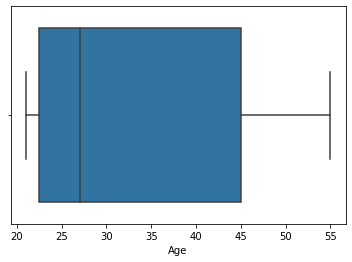

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Age'])

In [8]:
#position of outlinear
print(np.where(df['Age']>20))

(array([0, 1, 2, 3, 4, 5], dtype=int64),)


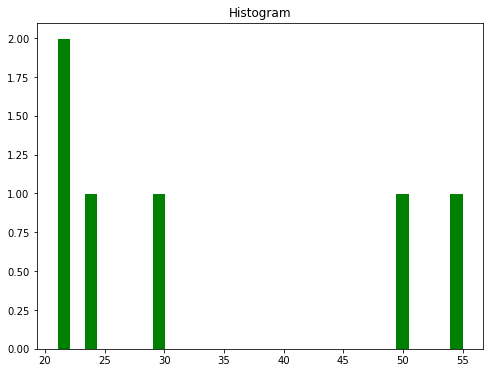

In [9]:
fig,x=plt.subplots(figsize=(8,6))
ax=plt.hist(df['Age'],bins=30,color='g',edgecolor='w')
plt.title('Histogram')
plt.show()

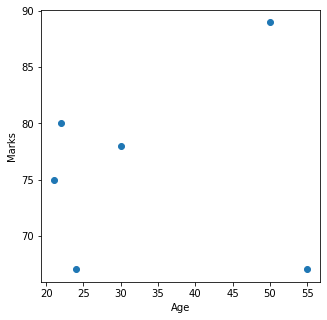

In [10]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df['Age'],df['Marks'])

#x-axis label
ax.set_xlabel('Age')

#y- axis label
ax.set_ylabel('Marks')
plt.show()

In [11]:
df['Log_Age']=np.log(df['Age'])
df

,Name,Age,Gender,Marks,PhD,Log_Age
0,Pranav,21,M,75,Y,3.044522
1,Alekh,22,M,80,Y,3.091042
2,Joe,50,M,89,N,3.912023
3,Vladimir,55,M,67,Y,4.007333
4,Angel,24,F,67,N,3.178054
5,Smriti,30,F,78,Y,3.401197


In [12]:
df_scaled=df.copy()
col=['Age','Marks']
features=df_scaled[col]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_scaled[col]=scaler.fit_transform(features.values)
df_scaled

,Name,Age,Gender,Marks,PhD,Log_Age
0,Pranav,0.000000,M,0.363636,Y,3.044522
1,Alekh,0.029412,M,0.590909,Y,3.091042
2,Joe,0.852941,M,1.000000,N,3.912023
3,Vladimir,1.000000,M,0.000000,Y,4.007333
4,Angel,0.088235,F,0.000000,N,3.178054
5,Smriti,0.264706,F,0.500000,Y,3.401197
